In [1]:
from qiskit import IBMQ
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.2', 'qiskit-aqua': '0.9.5', 'qiskit': '0.33.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
IBMQ.stored_account()

{'token': '2916c8f35261ae6714a1a3a0be3f95ce6f350a68307bfd3a12bb007ffa6dfac17a11d72b46e629512f960313e26f81dd2761912721c64797229a9d74048b4cd7',
 'url': 'https://auth.quantum-computing.ibm.com/api'}

In [3]:
#IBMQ.enable_account(token,url)

In [4]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='anl', project='csc430')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430

In [5]:
import math
import numpy as np
import random
import re
import qiskit.tools.jupyter

from qiskit import *
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import StochasticSwap, BasicSwap

from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
%matplotlib inline

from qiskit.providers.aer import AerSimulator

In [6]:
device = provider.get_backend('ibmq_casablanca')
backend_monitor(device)
device

ibmq_casablanca
Configuration
-------------
    n_qubits: 7
    operational: True
    status_msg: dedicated
    pending_jobs: 49
    backend_version: 1.2.51
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    pulse_num_qubits: 3
    sample_name: family: Falcon, revision: 4, segment: H
    allow_q_object: True
    credits_required: True
    dynamic_reprate_enabled: True
    conditional: False
    parametric_pulses: ['gaussian', 'gaussian_square', 'drag', 'constant']
    allow_object_storage: True
    n_uchannels: 12
    hamiltonian: {'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of transformations:\n\n$(\\mathbb{I}-\\sigma_{i}^z)/2 \\rightarrow O_i \\equiv b^\\dagger_{i} b_{i}$,\n\n$\\sigma_{+} \\rightarrow b^\\dagger$,\n\n$\\sigma_{-} \\rightarrow b$,\n\n$\\sigma_{i}^X \\rightarrow b^\\dag

Qubits [Name / Freq / T1 / T2 / RZ err / SX err / X err / Readout err]
----------------------------------------------------------------------
    Q0 / 4.82193 GHz / 85.72423 us / 23.63986 us / 0.00000 / 0.00030 / 0.00030 / 0.03920 
    Q1 / 4.76013 GHz / 174.96837 us / 81.97175 us / 0.00000 / 0.00025 / 0.00025 / 0.02320 
    Q2 / 4.90564 GHz / 143.72274 us / 168.27320 us / 0.00000 / 0.00017 / 0.00017 / 0.01460 
    Q3 / 4.87870 GHz / 54.85782 us / 98.40610 us / 0.00000 / 0.00024 / 0.00024 / 0.02150 
    Q4 / 4.87111 GHz / 140.19709 us / 51.92104 us / 0.00000 / 0.00024 / 0.00024 / 0.02870 
    Q5 / 4.96429 GHz / 140.95306 us / 138.99026 us / 0.00000 / 0.00049 / 0.00049 / 0.01170 
    Q6 / 5.17717 GHz / 133.83982 us / 141.63074 us / 0.00000 / 0.00029 / 0.00029 / 0.01100 

Multi-Qubit Gates [Name / Type / Gate Error]
--------------------------------------------
    cx6_5 / cx / 0.00820
    cx5_6 / cx / 0.00820
    cx5_4 / cx / 0.01008
    cx4_5 / cx / 0.01008
    cx5_3 / cx / 0.00899
    

<IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>

In [12]:
circ = QuantumCircuit(3)
circ.ccx(0,1,2)

In [13]:
circ.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [14]:
trans_circ = transpile(circ, backend=device,initial_layout = [0,1,3], optimization_level = 3)

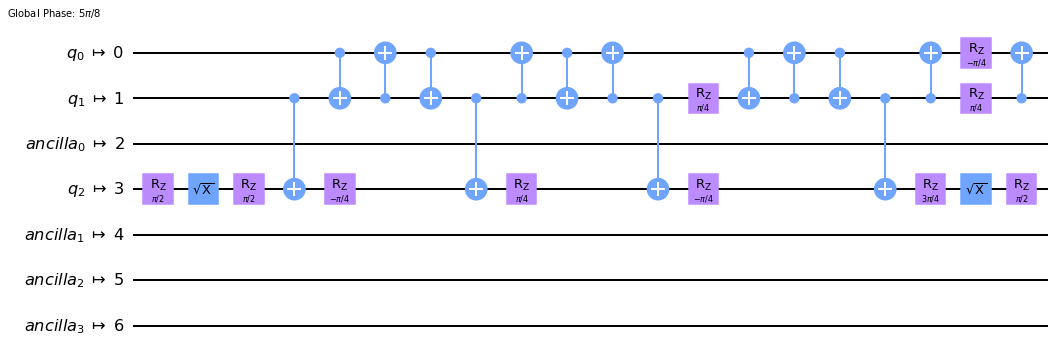

In [16]:
trans_circ.draw(output = 'mpl')

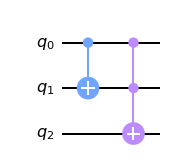

In [12]:
circ = QuantumCircuit(3)
circ.cx(0,1)
circ.ccx(0,1,2)
circ.draw(output = 'mpl')

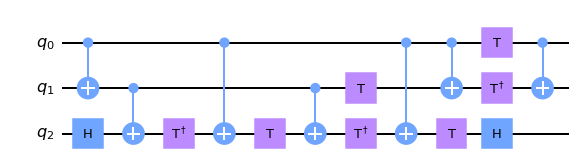

In [13]:
trans_circ = transpile(circ, optimization_level = 3)
trans_circ.draw(output = 'mpl')

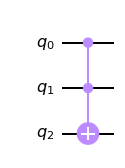

In [14]:
circ2 = QuantumCircuit(3)
circ2.ccx(0,1,2)
circ2.draw(output = 'mpl')

In [ ]:
trans_circ2 = transpile(circ2, optimization_level = 3)
trans_circ2.draw(output = 'mpl')

In [ ]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ2, simulator).result()
unitary = result.get_unitary(circ2)
print("Circuit unitary:\n", unitary)

In [ ]:
circ3 = QuantumCircuit(3)
circ3.ccx(0,1,2).inverse()
circ3.draw(output = 'mpl')

In [ ]:
trans_circ2 = transpile(circ3, optimization_level = 3)
trans_circ2.draw(output = 'mpl')

In [ ]:
circ3 = trans_circ2.inverse()
circ3.draw(output = 'mpl')

In [ ]:
circ4 = QuantumCircuit(3)
circ4.cx(1,0)
circ4.t(0)
circ4.tdg(1)
circ4.cx(1,0)
circ4.h(2)
circ4.tdg(2)
circ4.cx(1,2)
circ4.tdg(0)
circ4.t(2)
circ4.cx(0,2)
circ4.tdg(2)
circ4.cx(1,2)
circ4.t(2)
circ4.cx(0,2)
circ4.h(2)
circ4.draw(output = 'mpl')

In [ ]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ4, simulator).result()
unitary = result.get_unitary(circ4)
print("Circuit unitary:\n", unitary)

In [ ]:
circ5 = QuantumCircuit(3)
circ5.cx(0,1)
circ5 = circ5 + trans_circ2.inverse()
circ5.draw()

In [ ]:
trans_circ = transpile(circ5, optimization_level = 2)
trans_circ.draw(output = 'mpl')

In [ ]:
tqc = circ4.inverse()
tqc.draw(output = 'mpl')

In [ ]:
circ5 = QuantumCircuit(3)
circ5.h(2)
circ5.cx(0,1)
circ5.tdg(1)
circ5.cx(2,1)
circ5.t(1)
circ5.cx(0,1)
circ5.t(0)
circ5.tdg(1)
circ5.cx(2,1)
circ5.cx(2,0)
circ5.tdg(0)
circ5.t(2)
circ5.t(1)
circ5.cx(2,0)
circ5.h(2)
circ5.draw(output = 'mpl')

In [ ]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ5, simulator).result()
unitary = result.get_unitary(circ5)
print("Circuit unitary:\n", unitary)

In [ ]:
circ5 = QuantumCircuit(3)
circ5.h(2)
circ5.t(0)
circ5.t(1)
circ5.t(2)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.t(2)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.tdg(1)
circ5.tdg(2)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.tdg(2)
circ5.cx(1,2)
circ5.h(2)
circ5.draw(output = 'mpl')

In [ ]:
circ5 = QuantumCircuit(3)
circ5.cx(0,2)
circ5.draw(output = 'mpl')

In [ ]:
circ5 = QuantumCircuit(3)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.draw(output = 'mpl')

In [ ]:
circ5 = QuantumCircuit(3)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.cx(0,1)
circ5.cx(1,2)
circ5.draw(output = 'mpl')